In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Read data file
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv', index_col='Date')

# PREPROCESSING DATA

In [4]:
# Flip the dataset
df = df.iloc[::-1]

# Reset the index
df = df.reset_index(drop=True)

# Drop unused columns
df.drop(['Vol.', 'Change %'], axis=1, inplace = True)

# Drop missing values
df = df.dropna()

In [5]:
df

,Price,Open,High,Low
0,"1,290.90","1,290.30","1,292.70","1,281.20"
1,"1,292.00","1,292.30","1,296.00","1,287.20"
2,"1,289.60","1,290.60","1,298.40","1,286.70"
3,"1,304.40","1,293.30","1,306.40","1,292.20"
4,"1,303.70","1,304.00","1,307.20","1,299.40"
...,...,...,...,...
1291,"2,018.00","2,013.80","2,017.10","2,013.80"
1292,"1,988.40","2,021.30","2,022.70","1,989.10"
1293,"1,980.70","1,983.60","1,983.60","1,983.60"
1294,"1,956.50","1,956.80","1,956.80","1,956.80"


In [6]:
# Format column Price to float
# List of column names to convert
columns = ['Price', 'Open', 'High', 'Low']

# Iterate over the columns and convert them to float
for column in columns:
    df[column] = df[column].str.replace(',', '').astype(float)
df

,Price,Open,High,Low
0,1290.9,1290.3,1292.7,1281.2
1,1292.0,1292.3,1296.0,1287.2
2,1289.6,1290.6,1298.4,1286.7
3,1304.4,1293.3,1306.4,1292.2
4,1303.7,1304.0,1307.2,1299.4
...,...,...,...,...
1291,2018.0,2013.8,2017.1,2013.8
1292,1988.4,2021.3,2022.7,1989.1
1293,1980.7,1983.6,1983.6,1983.6
1294,1956.5,1956.8,1956.8,1956.8


# SPLITTING DATA(7-2-1)

In [7]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

# FIND BEST VALUE FOR K

In [8]:
# Import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.678864938309518
RMSE value for k=  2 is: 9.29527114381638
RMSE value for k=  3 is: 9.183424076986649
RMSE value for k=  4 is: 9.32070778585745
RMSE value for k=  5 is: 9.24685493856298
RMSE value for k=  6 is: 8.947070693951956
RMSE value for k=  7 is: 8.953431524116787
RMSE value for k=  8 is: 9.191410568220249
RMSE value for k=  9 is: 9.292277611485968
RMSE value for k=  10 is: 9.298963138114686
RMSE value for k=  11 is: 9.412731896852371
RMSE value for k=  12 is: 9.553472587564105
RMSE value for k=  13 is: 9.628623072571276
RMSE value for k=  14 is: 9.711720312355585
RMSE value for k=  15 is: 9.807848136609042
RMSE value for k=  16 is: 9.879158210709056
RMSE value for k=  17 is: 9.979175155680545
RMSE value for k=  18 is: 10.033869753624924
RMSE value for k=  19 is: 10.142205081896684
RMSE value for k=  20 is: 10.415971164940933


<Axes: >

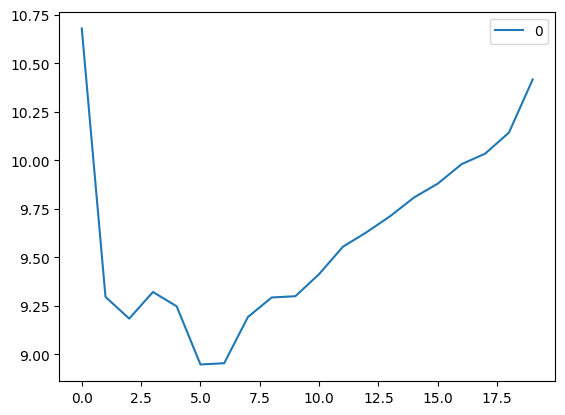

In [10]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [11]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 8)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [12]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [13]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1190.075 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075
 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075
 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075
 1190.075 1190.075 1190.075 1190.075 1190.075 1190.075]


In [14]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  9.191410568220249
Testing MAE:  7.330984555984564
Testing MAPE:  0.40707571231080425
Validation RMSE:  10.915411707323956
Validation MAE:  7.993365384615399
Validation MAPE:  0.41416466516839956


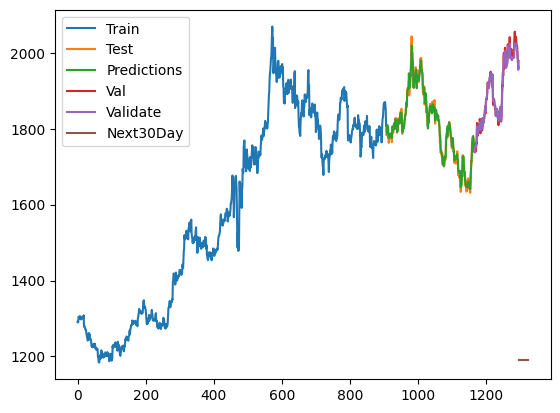

In [15]:
# Plot the model
plt.plot(train_data.index,train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [16]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.99


# SPLITTING DATA(6-3-1)

In [17]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [18]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [19]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.130209300104204
RMSE value for k=  2 is: 9.367127966469038
RMSE value for k=  3 is: 9.387435128271967
RMSE value for k=  4 is: 9.449159435970579
RMSE value for k=  5 is: 9.245177581050278
RMSE value for k=  6 is: 8.984412929473198
RMSE value for k=  7 is: 9.15757238836691
RMSE value for k=  8 is: 9.414571168669799
RMSE value for k=  9 is: 9.49012269707425
RMSE value for k=  10 is: 9.54909396846406
RMSE value for k=  11 is: 9.643438514095404
RMSE value for k=  12 is: 9.69355856626186
RMSE value for k=  13 is: 9.695209081126698
RMSE value for k=  14 is: 9.66089285208972
RMSE value for k=  15 is: 9.63524493958608
RMSE value for k=  16 is: 9.691051186492972
RMSE value for k=  17 is: 9.821000518088388
RMSE value for k=  18 is: 9.877739722699753
RMSE value for k=  19 is: 9.92598649590402
RMSE value for k=  20 is: 10.173061009174763


<Axes: >

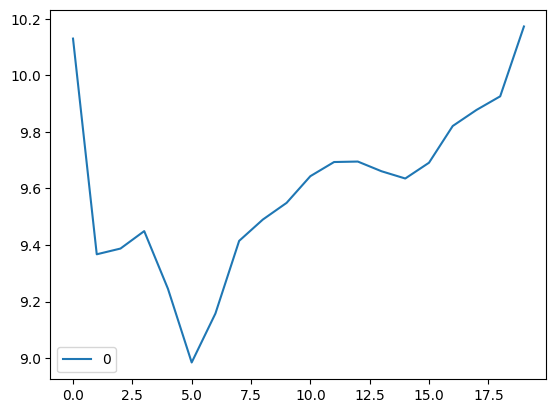

In [20]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [21]:
# create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 14)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=14)

In [22]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [23]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714
 1194.54285714 1194.54285714 1194.54285714 1194.54285714 1194.54285714]


In [24]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  9.66089285208972
Testing MAE:  7.4275957290132535
Testing MAPE:  0.4120387284972217
Validation RMSE:  15.632133081269126
Validation MAE:  11.37251908396944
Validation MAPE:  0.5860524957847394


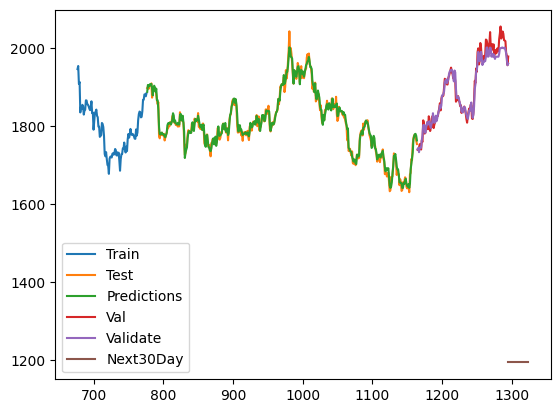

In [25]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [26]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.98


# SPLITTING DATA(5-3-2)

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [28]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [29]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 11.981304164594786
RMSE value for k=  2 is: 11.197597887654679
RMSE value for k=  3 is: 10.851443493275143
RMSE value for k=  4 is: 11.447496969017717
RMSE value for k=  5 is: 11.732534727586385
RMSE value for k=  6 is: 11.740850212700389
RMSE value for k=  7 is: 11.815390829169953
RMSE value for k=  8 is: 12.092473460159622
RMSE value for k=  9 is: 12.178547748565757
RMSE value for k=  10 is: 11.990832419536309
RMSE value for k=  11 is: 12.003464947343273
RMSE value for k=  12 is: 12.075122810402915
RMSE value for k=  13 is: 12.265376396705944
RMSE value for k=  14 is: 12.406791292543453
RMSE value for k=  15 is: 12.610069723012854
RMSE value for k=  16 is: 12.889395618508969
RMSE value for k=  17 is: 13.065114348049972
RMSE value for k=  18 is: 13.271219428892776
RMSE value for k=  19 is: 13.270964079212247
RMSE value for k=  20 is: 13.306362819901073


<Axes: >

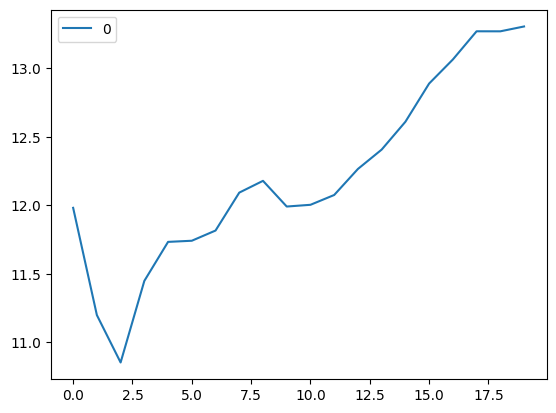

In [30]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [31]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 11)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [32]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [33]:
# Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1191.09090909 1191.09090909 1191.09090909 1191.09090909 1191.09090909
 1191.09090909 1191.09090909 1191.09090909 1191.09090909 1191.09090909
 1191.09090909 1191.09090909 1191.09090909 1191.09090909 1191.09090909
 1191.09090909 1191.09090909 1191.09090909 1191.09090909 1191.09090909
 1191.09090909 1191.09090909 1191.09090909 1191.09090909 1191.09090909
 1191.09090909 1191.09090909 1191.09090909 1191.09090909 1191.09090909]


In [34]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  12.003464947343273
Testing MAE:  9.1424554826617
Testing MAPE:  0.5002084701475888
Validation RMSE:  13.99453185942281
Validation MAE:  10.762797202797227
Validation MAPE:  0.5837332011470459


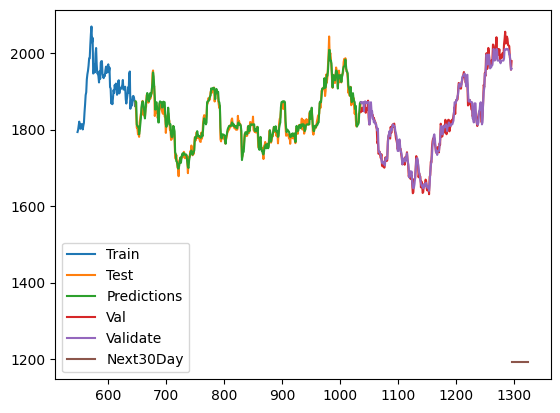

In [35]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [36]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.96


# EVALUATING MODEL

---

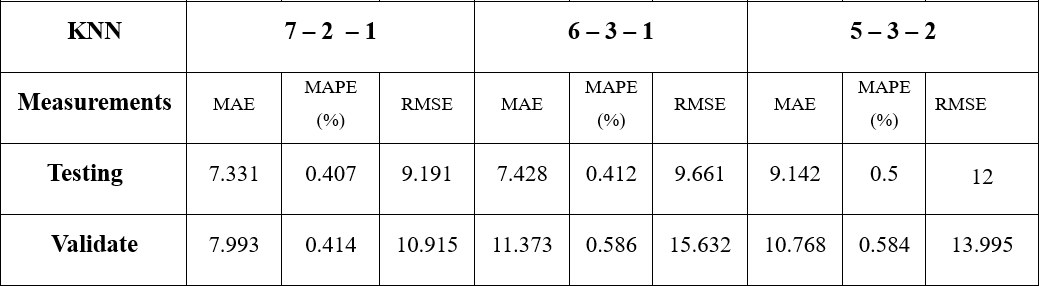